# Model 1

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score, roc_curve
import numpy as np

In [2]:
model_df = pd.read_csv("status.csv")
model_df.head()

,hypertension,heart_disease,diabetes,problematic,gender,smoking_history_No Info,smoking_history_current,smoking_history_not current,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,0,0,0,0.0,0.0,1.0,1.000000,-0.645658,0.127273,-0.454545
1,0,0,0,0,0,1.0,0.0,0.0,0.349349,-0.595938,0.127273,-1.000000
2,0,0,0,0,1,0.0,0.0,1.0,-0.301301,-0.595938,-0.200000,-0.290909
3,0,0,0,0,0,0.0,1.0,0.0,-0.101101,-0.686275,-0.454545,-0.318182
4,1,1,0,0,1,0.0,1.0,0.0,0.899900,-0.763539,-0.527273,-0.318182


In [3]:
# Define features (X) and target (y)
X = model_df.drop("diabetes",axis=1)
y = model_df["diabetes"]

In [4]:
# Split data into training and test sets
X_train_, X_test, y_train_, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
X_train_.shape,X_test.shape

((89983, 11), (9999, 11))

In [5]:
# Random Under-Sampling to balance the training set
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train_, y_train_)

/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [6]:
len(y_train), len(y_test),len(X_train), len(X_test)

(15300, 9999, 15300, 9999)

In [7]:
# Build a neural network model 
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh')) 
model.add(Dense(32, activation='tanh'))  
model.add(Dense(1, activation='sigmoid'))  

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.summary()


# Train the model with early stopping to prevent overfitting
h = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=15)]
    )

/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-24 18:35:54.070774: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-24 18:35:54.070797: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-24 18:35:54.070802: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-24 18:35:54.070817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-24 18:35:54.070826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-08-24 18:35:54.398822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8381 - loss: 0.3904 - val_accuracy: 0.8657 - val_loss: 0.2827
Epoch 2/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8844 - loss: 0.2436 - val_accuracy: 0.8763 - val_loss: 0.2620
Epoch 3/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8835 - loss: 0.2446 - val_accuracy: 0.9073 - val_loss: 0.2080
Epoch 4/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8855 - loss: 0.2412 - val_accuracy: 0.8842 - val_loss: 0.2499
Epoch 5/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8904 - loss: 0.2372 - val_accuracy: 0.8558 - val_loss: 0.3041
Epoch 6/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8859 - loss: 0.2409 - val_accuracy: 0.8749 - val_loss: 0.2686
Epoch 7/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8830 - loss: 0.2455 - val_accuracy: 0.9009 - val_loss: 0.2188
Epoch 8/200
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8875 - loss: 0.2407 - val_accuracy: 0.

In [8]:
# Plot training vs validation accuracy and loss across epochs
def LossHistory (history):
    # Accuracy 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

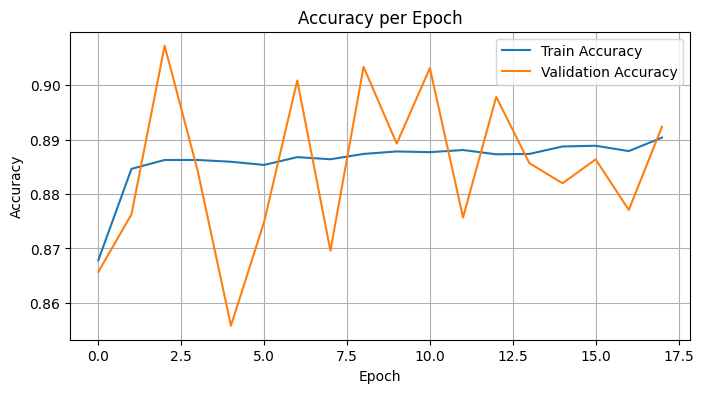

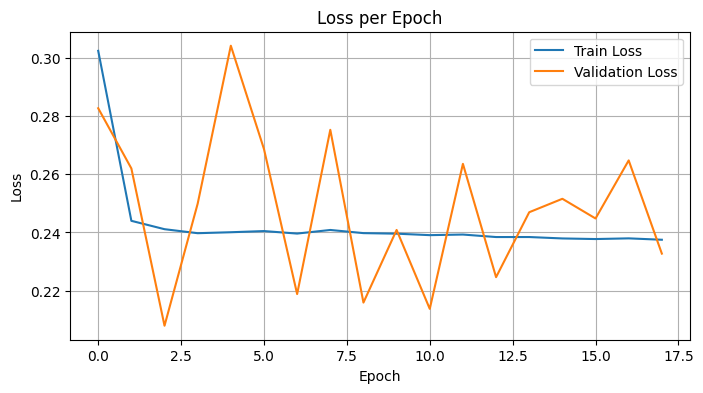

In [9]:
LossHistory(h)

In [10]:
# Evaluate model performance on train set
y_pred_prob_train = model.predict(X_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

print(classification_report(y_train, y_pred_train))

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7650
           1       0.89      0.88      0.89      7650

    accuracy                           0.89     15300
   macro avg       0.89      0.89      0.89     15300
weighted avg       0.89      0.89      0.89     15300



In [11]:
# Evaluate model performance on test set
y_pred_prob_test = model.predict(X_test)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

print(classification_report(y_test, y_pred_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9149
           1       0.44      0.89      0.59       850

    accuracy                           0.89      9999
   macro avg       0.71      0.89      0.76      9999
weighted avg       0.94      0.89      0.91      9999



In [12]:
train_accuracy=accuracy_score(y_train, y_pred_train)
print("Train accuracy:" , train_accuracy)

Train accuracy: 0.8879084967320261


In [13]:
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Test accuracy:" , test_accuracy)

Test accuracy: 0.8923892389238924


In [14]:
# Generate confusion matrix to evaluate classification results
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[8163,  986],
       [  90,  760]])

In [15]:
# Compute ROC curve and AUC score for model evaluation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
auc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC Score:", auc_score)

AUC Score: 0.9641579600470639


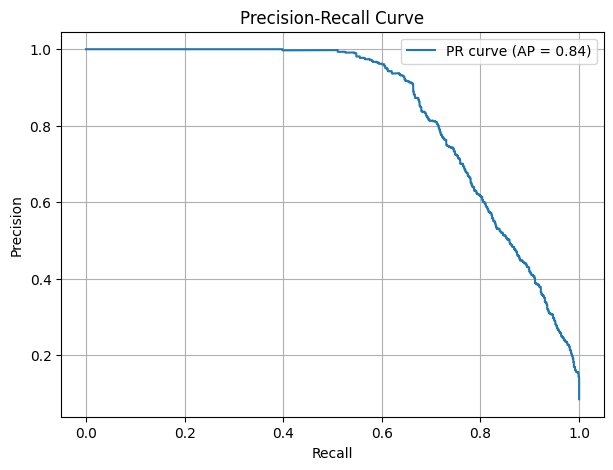

In [16]:
#Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

ap = average_precision_score(y_test, y_pred_prob_test)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR curve (AP = {ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [17]:
valid_idx = np.where(recall > 0.85)

precision_valid = precision[valid_idx]
recall_valid = recall[valid_idx]
thresholds_valid = thresholds[valid_idx[0]-1]  

best_idx = np.argmax(precision_valid)
best_precision = precision_valid[best_idx]
best_recall = recall_valid[best_idx]
best_threshold = thresholds_valid[best_idx]

print("Best Threshold:", best_threshold)

y_pred_opt = (y_pred_prob_test >= best_threshold).astype(int)


print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_opt))

cm_opt = confusion_matrix(y_test, y_pred_opt)
print("Confusion Matrix (Optimized Threshold):\n", cm_opt)

Best Threshold: 0.6076183

Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.99      0.93      0.95      9149
           1       0.51      0.85      0.64       850

    accuracy                           0.92      9999
   macro avg       0.75      0.89      0.80      9999
weighted avg       0.95      0.92      0.93      9999

Confusion Matrix (Optimized Threshold):
 [[8463  686]
 [ 127  723]]
